<a href="https://colab.research.google.com/github/seemantKaul/MachineLearning/blob/master/Kaggle_Dog_breed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-class image classifier to identify the breed of a dog from image

---

## Problem
To identify the breed of a dog from picture

## Data Source
Data is from Kaggle.com
https://www.kaggle.com/c/dog-breed-identification/data

## Evaluation
output is a probability number of each breed for an image   
https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## Features
We have unstructured data (images) so we will do a Transfer learning.
We have 10,000 images in Training and 10,000 images in Test
We have a csv file with filename and its breed. 



In [0]:
# import tensorflow as tf

# Importing Tensorflow

In [0]:
## import tenserflow 2.x
try:
  %tensorflow_version 2.x
except Exception:
  pass

In [0]:
import tensorflow as tf

In [187]:
tf.__version__

'2.1.0'

# Getting Data and environment ready

### Unzipping files

In [0]:
# !unzip 'drive/My Drive/Colab Notebooks/Data/Dog_Breed_Detection/dog-breed-identification.zip' -d '/content/drive/My Drive/Colab Notebooks/Data/Dog_Breed_Detection/'

### comparing file count with Label count

In [0]:
import pandas as pd
labels_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/Dog_Breed_Detection/labels.csv')

In [190]:
len(labels_df)

10222

In [0]:
# import os
# len(os.listdir('/content/drive/My Drive/Colab Notebooks/Data/Dog_Breed_Detection/train/'))

### Checking if GPU is installed
if not, clik on 'Chnage Runtime type' and select GPU


In [192]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [193]:
labels_df.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

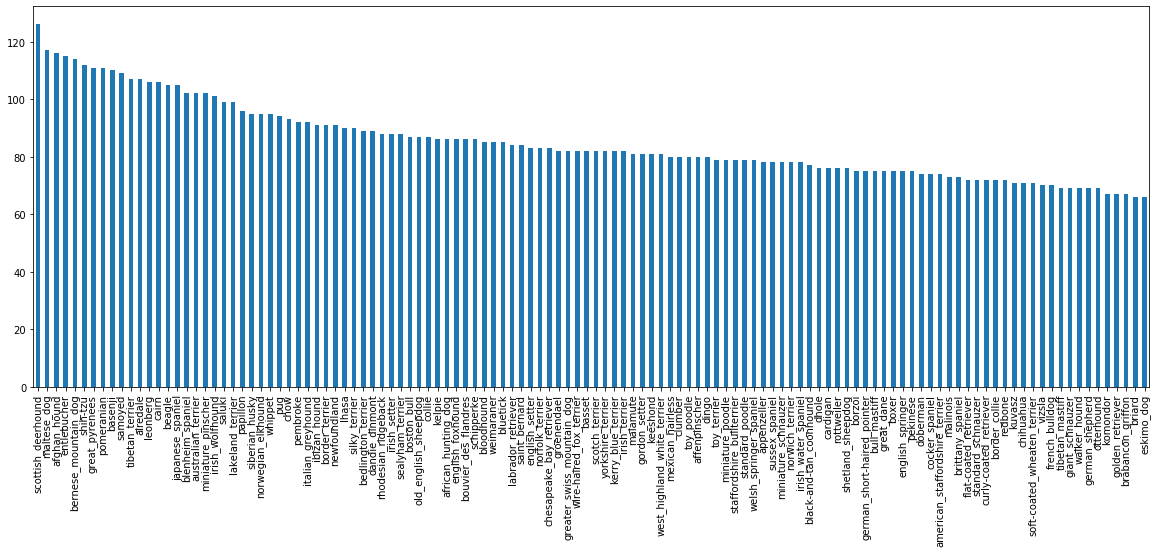

In [194]:
labels_df["breed"].value_counts().plot(kind="bar", figsize = (20,7));

In [195]:
labels_df.describe()

id               breed
count                              10222               10222
unique                             10222                 120
top     670bfb984c89fe3701b43205699c4658  scottish_deerhound
freq                                   1                 126

In [196]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
id       10222 non-null object
breed    10222 non-null object
dtypes: object(2)
memory usage: 159.8+ KB


### Creating target matrix of boolean values

In [0]:
# grab unique breeds
import numpy as np
breeds = np.array(labels_df['breed'])

In [198]:
len(breeds)

10222

In [0]:
breed_header = np.unique(breeds)

In [200]:
len(breed_header)

120

In [0]:
target_matrix = [(breed==breed_header) for breed in breeds]

In [0]:
#Converting to np array
label_bool = np.array(target_matrix)

In [203]:
#check
label_bool[:10]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

## Getting filenames

In [0]:
filenames = "/content/drive/My Drive/Colab Notebooks/Data/Dog_Breed_Detection/train/" + labels_df['id'] + ".jpg"

In [205]:
filenames.head()

0    /content/drive/My Drive/Colab Notebooks/Data/D...
1    /content/drive/My Drive/Colab Notebooks/Data/D...
2    /content/drive/My Drive/Colab Notebooks/Data/D...
3    /content/drive/My Drive/Colab Notebooks/Data/D...
4    /content/drive/My Drive/Colab Notebooks/Data/D...
Name: id, dtype: object

In [0]:
# Open a file and check
from IPython.display import display, Image


In [0]:
# Image(filenames[100]), labels_df['breed'][112]


## Split Train data into Train and Validate set

In [0]:
SIZE_LIMIT = 1000 #@param {type:"slider", min:1000, max:10223, step:1 }
X = filenames[:SIZE_LIMIT]
y = label_bool[:SIZE_LIMIT]

In [0]:
from sklearn.model_selection import train_test_split
np.random.seed(42)

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2)

In [210]:
len(X_train), len(X_val),  len(y_train), len(y_val)

(800, 200, 800, 200)

In [211]:
y_train[:2]

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, Fals

# Image pre-processing
## create a fuction for Image pre-processing
1. Reads an image filepath as input
2. Use Tensorflow to read the file and save it to a variable 'image'
3. Converts the 'image' to Tensor (matrix of numbers)
4. Normalize the color channels from (0-255) to (0-1)
5. resize the image to 224 X 224
6. Return the modified image


In [0]:
from matplotlib.pyplot import imread

In [0]:
# reading image as a numpy array
# image = imread(filenames[10])

In [0]:
# image[:2]

In [0]:
# converting numpy array into tensor
# tensor = tf.constant(image)

In [0]:
# tensor[:2]

In [0]:
IMG_SIZE = 224
def process_image(img_path, size = IMG_SIZE):
  """
  Reads an image filepath as input
  Use Tensorflow to read the file and save it to a variable 'image'
  Converts the 'image' to Tensor (matrix of numbers)
  Normalize the color channels from (0-255) to (0-1)
  resize the image to size provided (size depends on the model used)
  Return the modified image
  """
  # Read the file using tensorflow
  image = tf.io.read_file(img_path)
  
  # Convert file into tensor
  image = tf.image.decode_jpeg(image, channels=3)

  # Normalize the RGB channel
  image = tf.image.convert_image_dtype(image,tf.float32)

  # Resize the image
  image = tf.image.resize(image, size = [size, size])
  
  return image

## Make a function that returns the image and label as tuple of tensors 

In [0]:
def get_image_label(img_path, label):
  """
  Takes an image path and label as input and returns the processed image and 
  label in form of a tensor tuple 
  """
  # print(img_path)
  # print(label)
  image = process_image(img_path)
  # I have changed the return to label instead of tf.constant(label) because I 
  # was facing an issue when calling this function inside create_data_batches
  
  # return image, tf.constat(label) 
  return image, label

In [0]:
# get_image_label(X[42], y[42])

## Putting data into batches of size 32

### Create a function to turn all of our data into batches of 32
Takes input as (img_path, label) pair or just img_path depending on what type data set it is (Train, Vilidate, Test)
Shuffel the data if the type is Train, do not shuffle if it is Validate or Test type. It is better to shuffle the file paths rather than shuffeling images
turns all the data into batches of 32

In [0]:
BATCH_SIZE = 32
def create_data_batches(X, y=None, batch_size = BATCH_SIZE, validation_data = False, test_data=False):
  """
  Takes input as (img_path, label) pair or just img_path depending on what type data set it is (Train, Vilidate, Test)
  Shuffel the data if the type is Train, do not shuffle if it is Validate or Test type. It is better to shuffle the file paths rather than shuffeling images
  turns all the data into batches of 32
  X: list of img_paths
  y: list of labels (optional)
  batch_size: size of a batch, 32 default
  validation_data: flag indicating this is validation data
  test_data: flag indicating this is test data  
  """
  if test_data:
    print("Creating test data batches")
    data = tf.data.Dataset.from_tensor_slices(tf.constant(X))
    data_batch = data.map(process_image).batch(batch_size)
    return data_batch
  elif validation_data:
    print("Creating batches for Validation data")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
    data_batch = data.map(get_image_label).batch(batch_size)
    return data_batch
  else:
    print("Creating batches for Training data")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    data = data.shuffle(buffer_size=len(X))
    
    data = data.map(get_image_label)
    data_batch = data.batch(batch_size)
    return data_batch


In [221]:
# X_val
# type(X_val)
val_data = create_data_batches(X_val, y_val, validation_data=True)
train_data = create_data_batches(X_train, y_train)
# d = tf.data.Dataset.from_tensor_slices((tf.constant(X_train), tf.constant(y_train)))


Creating batches for Validation data
Creating batches for Training data


# Visualizing the data

In [0]:
import matplotlib.pyplot as plt


## un-batching the data
it returns a numpy array of 32 images and 32 labels

In [0]:
images, labels = next(train_data.as_numpy_iterator())

In [224]:
type(images)


numpy.ndarray

In [225]:
# Finding the index of TRUE in the array of labels[0]
breed_header[labels[0].argmax()]

'bernese_mountain_dog'

## Create a function that displays a 5 X 5 grid of photos and their corresponding labels


In [0]:
def show25images(images, labels):
  fig = plt.figure(figsize = (10,10))
  for i in range(25):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    # print(type(breed_header[labels[i].argmax()]))
    plt.title(breed_header[labels[i].argmax()])
    plt.axis("off")

In [0]:
# show25images(images, labels)

# Choosing a Model
We need to make sure we get 3 things
1. Shape of our input
2. Shape of our output
3. URL of our model

In [0]:
#1 Shape of our input
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]

#2 Shape of our output
OUTPUT_SHAPE = len(breed_header)

#3 Model URL
MODEL_URL = 'https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4'

## Build a function to create Model
Build a function that:
1. Takes Input shape, Output shape and model url as parameters
2. Defines the layers in keras model in Sequential fashion (do things one after the other)
3. Compiles the model (says it should be evaluated and improved)
4. Builds the model (tells the model the input shape it will be getting)
5. Returns the model

In [0]:
import tensorflow_hub as hub

In [0]:
def create_model(input_shape = INPUT_SHAPE, output_shape = OUTPUT_SHAPE, model_url = MODEL_URL):
  print("Building model with :", model_url)
  
  #setup the model layers
  model = tf.keras.Sequential([
                               hub.KerasLayer(model_url), #Layer 1  (Input Layer)
                               tf.keras.layers.Dense(units = output_shape,
                                                     activation = 'softmax') #Layer 2 (Dense layer)
                               ])
  
  #Compile the model
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics = ["accuracy"]
  )

  # Build the model
  model.build(input_shape)

  return model

In [231]:
# model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   multiple                  5432713   
_________________________________________________________________
dense_1 (Dense)              multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


# Creating callback functions
## 1. Call back function for writing logs
## 2. Callback function for early stopping a model to avoid overfitting  

In [232]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [0]:
import datetime
import os
def create_callback():
  log_path = os.path.join('/content/drive/My Drive/Colab Notebooks/logs',datetime.datetime.now().strftime('%Y%m%d-%h%m%s'))
  return tf.keras.callbacks.TensorBoard(log_path)

In [0]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy", patience=3)

# Train the model
## We are going to work on a smalls et of 1000 first

In [0]:
EPOCH_COUNT = 100  #@param{ type:"slider", min:10, max:100, step:10}

## Create a function for Training model
The function will
1. Create a model using create_model function we wrote
2. create a tensorboard using create_callback function we wrote
3. fit the model
4. return the fitted model

In [0]:
def train_model():
  model = create_model()
  tensorboard = create_callback()

  model.fit(x=train_data,
            epochs=EPOCH_COUNT,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  
  return model

In [237]:
# Check one more time if GPU is available
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [0]:
# model = train_model()

Looks like our model is overfitting because it is doing far better on the training set than on validation set

Question: What are the ways to prevent overfitting?

Note: Overfitting to begin with is a good thing. It means 
our model is learning!!

In [239]:
%tensorboard --logdir drive/My\ Drive/Colab\ Notebooks/logs

Reusing TensorBoard on port 6006 (pid 833), started 3:53:55 ago. (Use '!kill 833' to kill it.)

<IPython.core.display.Javascript object>

In [0]:
def save_model(model, suffix=None):
  """
  saves a given model after attaching an optional suffix
  """

  mod_dir = os.path.join('drive/My Drive/Colab Notebooks/Models', datetime.datetime.now().strftime("%Y%m%d-%H%M"))
  mod_path = mod_dir + "-" + suffix + ".h5"  #h5 is the save format of model
  model.save(mod_path)
  return mod_path

In [0]:
def load_model(model_path):
  """
  Loads a trained model
  """
  loaded_model = tf.keras.models.load_model(model_path, custom_objects={"KerasLayer":hub.KerasLayer})
  return loaded_model

In [0]:
# save_model(model,'First-1k')

In [243]:
loaded_model = load_model('drive/My Drive/Colab Notebooks/Models/20200313-1534-First-1k.h5')

In [244]:
loaded_model.evaluate(val_data)


7/7 [==============================] - 1s 196ms/step - loss: 1.2761 - accuracy: 0.6500


[1.2760626247950964, 0.65]

In [0]:
# model.evaluate(val_data)

### Make predictions on the  Evaluation set. This is not the data model was trained on

In [0]:
predictions = loaded_model.predict(val_data)

In [247]:
breed_header[predictions[14].argmax()]

'english_foxhound'

In [0]:
pred = [breed_header[pred.argmax()] for pred in predictions]
actual = [breed_header[act.argmax()] for act in y_val]
len(pred), len(actual)
results = pd.DataFrame(pred, columns=["Prediction"])
results["Actual"] = actual
# res = []
# for i in range(len(pred)):
#   res.append(results["Actual"]==results["Prediction"])
# results["Result"] = res

In [0]:
results["Match"] =  results['Actual']==results['Prediction']

In [250]:
results

Prediction             Actual  Match
0               cairn              cairn   True
1      scotch_terrier     scotch_terrier   True
2              basset             basset   True
3    lakeland_terrier           bluetick  False
4            airedale           airedale   True
..                ...                ...    ...
195        pomeranian         pomeranian   True
196            collie  shetland_sheepdog  False
197          bluetick           bluetick   True
198       maltese_dog        maltese_dog   True
199          cardigan        appenzeller  False

[200 rows x 3 columns]

### Creating a confusion matrix for Validation data

In [0]:

pd.DataFrame(index=breed_header, columns=breed_header)
confusion_matrix = pd.crosstab(results["Prediction"],results["Actual"])
with open('Matrix.txt','w') as file:
  file.write(confusion_matrix.to_csv())
  # file.close


In [252]:
confusion_matrix

Actual                   affenpinscher  ...  yorkshire_terrier
Prediction                              ...                   
affenpinscher                        2  ...                  0
afghan_hound                         0  ...                  0
african_hunting_dog                  0  ...                  0
airedale                             0  ...                  0
appenzeller                          0  ...                  0
...                                ...  ...                ...
weimaraner                           0  ...                  0
welsh_springer_spaniel               0  ...                  0
whippet                              0  ...                  0
wire-haired_fox_terrier              0  ...                  0
yorkshire_terrier                    0  ...                  1

[94 rows x 99 columns]

## Visualizing the result

### Function that takes an array of boolean values and gives a label

We have prediction list which is each an array of probabilities

We need to show the image along with top 10 probabilities


### Validation data is in batchform, we need to unbatch them

In [253]:
type(val_data)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [0]:
def unbatch_data(batched_data):
  """
  Accepts a batched data of Images and Labels and returns the unbatched Images and Lables
  """
  val_images = []
  val_labels = []
  for img, lbl in batched_data.unbatch().as_numpy_iterator():
    val_images.append(img)
    val_labels.append(lbl)
  return val_images, val_labels


In [0]:
val_images, val_labels = unbatch_data(val_data)
# val_images[0], val_labels[0]


In [0]:
# Function to return the label from a list of boolean
def get_label(bool_list):
  return breed_header[bool_list.argmax()]

In [0]:
# Function to compare the Prediction label against the truth label for a given index image
def compare_prediction(prediction_labels, true_labels, index):
  """
  Returns the True Label, Predicted lable and the prediction probablity for a given index
  """
# index =10 
  pred_label = get_label(prediction_labels[index])
  truth_label = get_label(true_labels[index])
  prob_pred = f"{prediction_labels[index].max()*100:.0f}%"
  return(truth_label, pred_label, prob_pred)


In [358]:
compare_prediction(predictions, val_labels, index = 10)

0.41940406


('yorkshire_terrier', 'toy_poodle', '42%')

### Let's show Dog image with true label and predicted label and probablity

In [0]:
# index=50
def show_25_predictions_with_images(predictions, true_labels, start_index=1):
  """
  Plots 25 images starting fro start_index. Shows True Label, Predicted label 
  and the probability of prediction as title for each image 
  """
  fig = plt.figure(figsize = (25,25))
  for i in range (start_index,start_index+25):
    true, pred, prob = compare_prediction(predictions,val_labels,i)
    if true == pred:
      color = 'green'
    else:
      color = 'red'
    ax = plt.subplot(5,5,i-start_index+1)
    plt.imshow(val_images[i])
    plt.title(compare_prediction(predictions,val_labels,i), color = color)
    plt.axis("off");


0.41940406
0.41940406
0.00027702667
0.00027702667
0.0012783608
0.0012783608
2.7195458e-05
2.7195458e-05
0.00033151358
0.00033151358
0.06497245
0.06497245
3.754585e-05
3.754585e-05
8.973108e-05
8.973108e-05
0.00036080414
0.00036080414
0.003594916
0.003594916
0.0006506517
0.0006506517
0.0009479112
0.0009479112
0.00020175173
0.00020175173
0.00063392165
0.00063392165
0.00028640113
0.00028640113
5.3465206e-05
5.3465206e-05
0.0017064569
0.0017064569
9.791847e-06
9.791847e-06
6.9933456e-05
6.9933456e-05
2.7395172e-05
2.7395172e-05
0.0013586567
0.0013586567
8.021222e-06
8.021222e-06
0.0004883809
0.0004883809
0.002996793
0.002996793
0.0002947096
0.0002947096


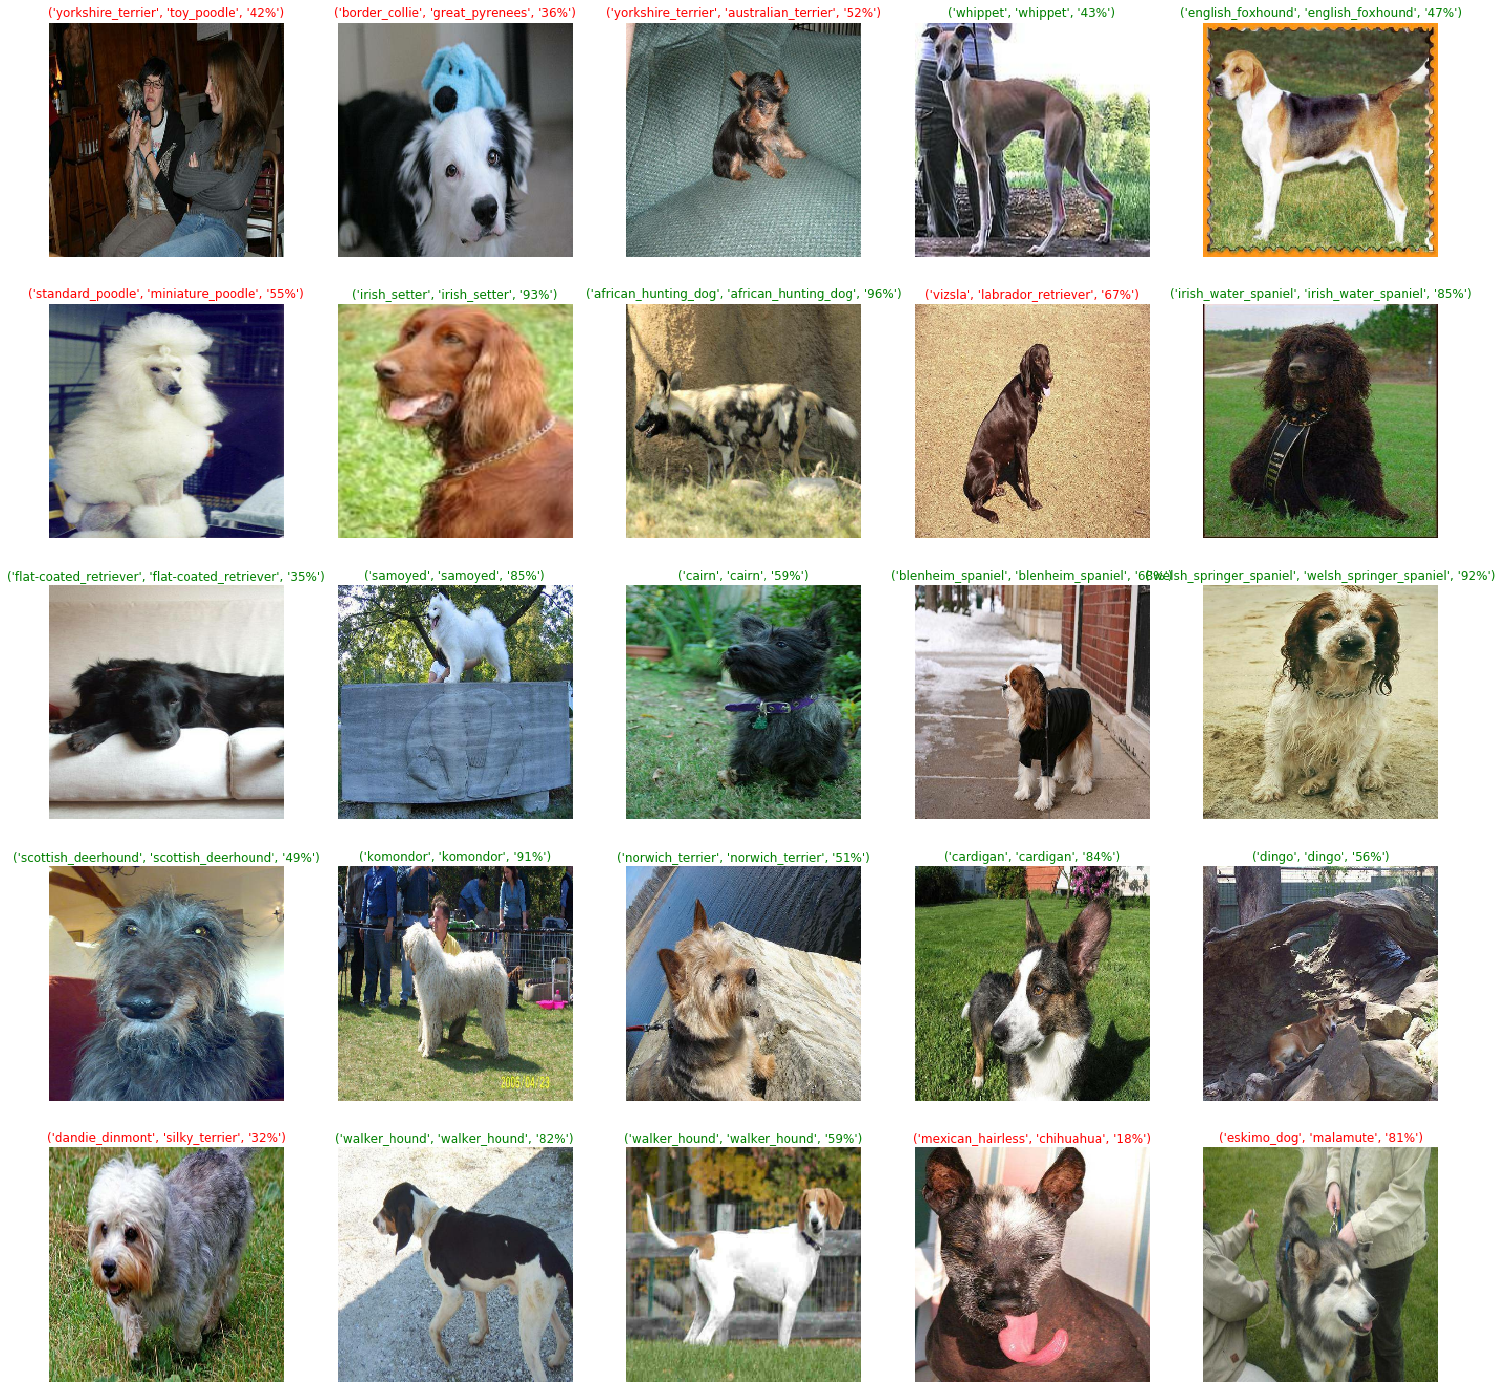

In [360]:
show_25_predictions_with_images(predictions, val_labels, 10)

In [0]:
# Write a function to return the top ten names along with their probabilities
def get_top_ten_results(list_prediction):
  """
  returns the top 10 predictions with probability of each
  """
  top_10_index = (list_prediction.argsort()[::-1][:11])
  # Here argsort() sorts the index in ascending order
  # [::-1] reverses that order so the list is in descending order (for top 10)
  # [:11] trims the result to top 10 values only
  # and we do it inside a List comprehension to do it for each list

  top_10_labels = breed_header[top_10_index]
  top_10_probabilities = [int(f"{p*100:.0f}") for p in list_prediction[top_10_index]] # Multiplying prob with 100 and rounding to 0 decimal
  return top_10_labels, top_10_probabilities

whippet ['whippet' 'italian_greyhound' 'saluki' 'scottish_deerhound'
 'ibizan_hound' 'afghan_hound' 'african_hunting_dog' 'cairn' 'borzoi'
 'english_foxhound' 'australian_terrier']


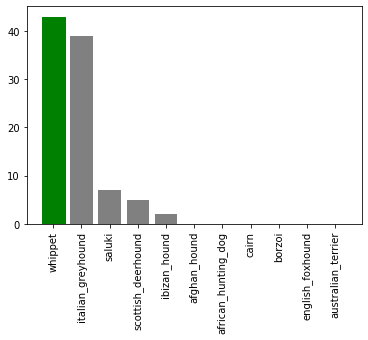

In [370]:
index = 13
top_labels, top_prob = get_top_ten_results(predictions[index])
true_label = get_label(val_labels[index])
print(true_label, top_labels)
top_plot = plt.bar(x=np.arange(len(top_labels)),height=top_prob, color = 'grey')
plt.xticks(np.arange(len(top_labels)),labels=top_labels, rotation = 90)
plt.yticks(np.arange(max(top_prob),step=10))
if np.isin(true_label, top_labels):
  top_plot[np.argmax(top_labels==true_label)].set_color('green');